# PD5
Krzysztof Wolny  
WUM-2021

Zadaniem było przetestować dwie metody klasteryzujace na zbiorze danych *clustering.csv*. Przygotowałem metody: 
* k-means
* klasteryzacja hierarchiczna

Zacznijmy od wczytania danych. 

In [1]:
# wczytanie bibliotek
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# wczytanie daynch
data = pd.read_csv('../../clustering.csv', header=None)

In [3]:
# Dane przedstawiają punkty w wymiarze R^2. 
data.head()

,0,1
0,41.788907,52.220182
1,-96.586516,90.957033
2,-54.143591,-99.153377
3,19.929231,-45.859779
4,-82.941076,84.099186


In [4]:
data.describe()

,0,1
count,400.000000,400.000000
mean,-0.580656,-8.010264
std,48.821210,62.096845
min,-107.433649,-128.983720
25%,-34.551495,-70.730416
50%,5.691010,-3.447565
75%,31.456507,45.822610
max,109.733409,99.935839


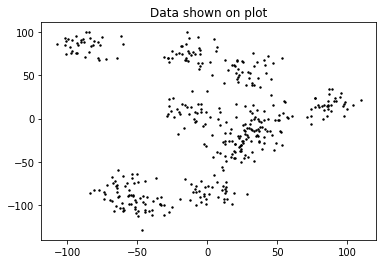

In [5]:
# rozkład punktów 
plt.scatter(data.iloc[:,0], data.iloc[:,1], c='k', s=2)
plt.title('Data shown on plot')
plt.show()

## Metoda k-średnich

### Ustalenie liczby klastrów

Przed rozpoczęciem klasteryzacji chcemy poznać optymalną liczbę klastrów. Aby to zrobić skorzystamy z metody Silhouette. 

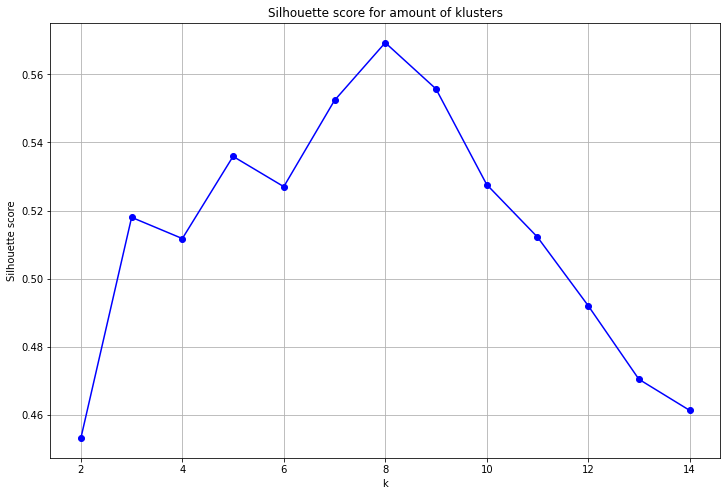

In [6]:
# Ustalamy liczbę klastrów używająć metody silhouette
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

cluster_num_seq = range(2, 15)
sil_socers = []
for i in cluster_num_seq:
    km = KMeans(n_clusters=i, random_state=0).fit_predict(data)
    sil_socers.append(silhouette_score(data, km))

plt.figure(figsize=(12, 8))
plt.plot(cluster_num_seq, sil_socers, 'bo-');

plt.title('Silhouette score for amount of klusters')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.grid()

plt.show()

Widzimy, że najlepszy wynik otrzymuje 8. Możemy jeszcze narysować współczynnik profilu dla najlepszych wyników, czyli dla 5-11 klastrów. 

In [7]:
from sklearn.metrics import silhouette_samples

def silhouette_coefficients(model_class, n_clusters, X):
    # source: https://github.com/ageron/handson-ml2/blob/master/09_unsupervised_learning.ipynb
    f = plt.figure(figsize=(5, 5))
    y_pred = model_class(n_clusters=n_clusters).fit_predict(X)
    silhouette_s = silhouette_score(X, y_pred)
    silhouette_coefficients = silhouette_samples(X, y_pred)
    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
            coeffs = silhouette_coefficients[y_pred == i]
            coeffs.sort()

            color = mpl.cm.inferno(i / k)
            plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                            facecolor=color, edgecolor=color, alpha=0.7)
            ticks.append(pos + len(coeffs) // 2)
            pos += len(coeffs) + padding
    plt.axvline(x=silhouette_s, linestyle='--', color='r')
    plt.title(f'k={n_clusters}', fontsize=14)

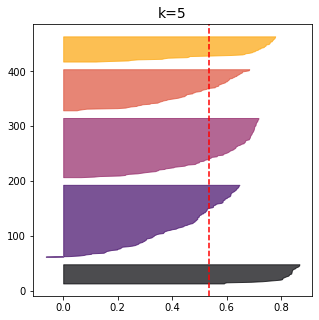

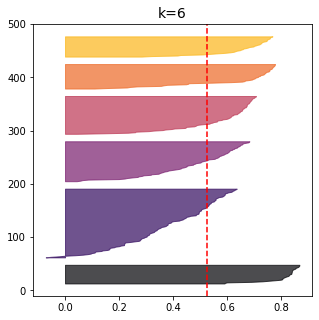

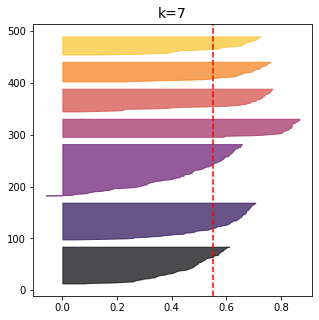

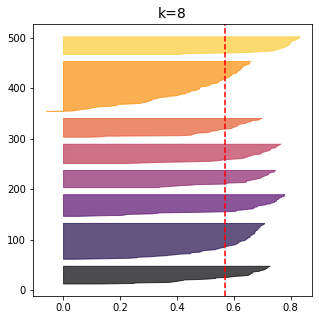

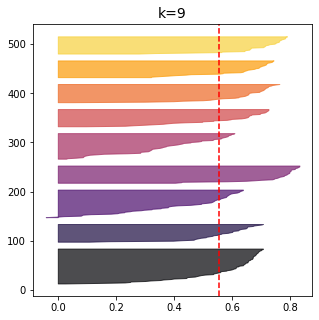

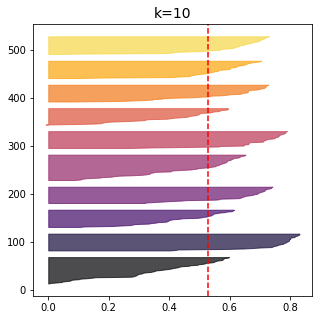

In [8]:
for k in range(5,11):
    silhouette_coefficients(KMeans, k, data)
    plt.show()

Na powyższym wykresie można odczytać, że liczba klastrów równa 8 jest dobrą liczbą klastrów i w związku z tym, że ta liczba otrzymał najwięksy wynik Silhouette to weżmiemy ją jako liczbę klastów w naszych metodach klasteryzujących. 

### K-means

In [9]:
kmeans = KMeans(n_clusters=8, random_state=0)
kmeans.fit(data)

KMeans(random_state=0)

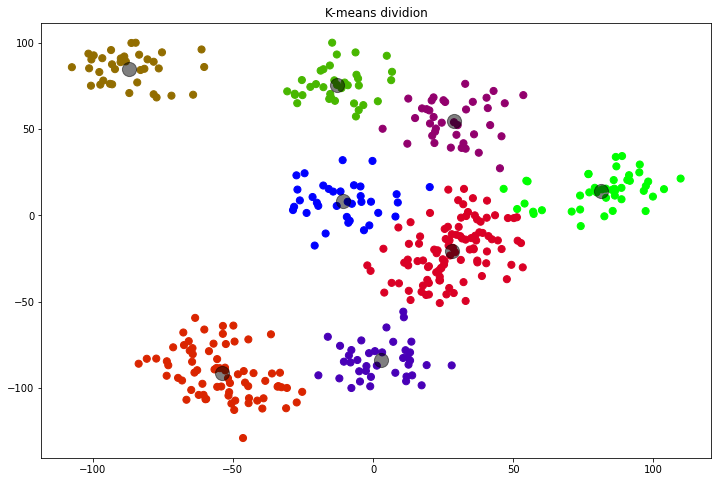

In [10]:
plt.figure(figsize=(12, 8))

plt.scatter(data.iloc[:,0], data.iloc[:,1], c=kmeans.labels_, s=50, cmap='brg')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

plt.title('K-means dividion')
plt.show()

Podział pokazany na wykresie wygląda dobrze. 

## Klasteryzacja hierarchiczna

### Ustalenie liczby klastrów

Tym razem użyjmy metryki Davida-Bouldina. 

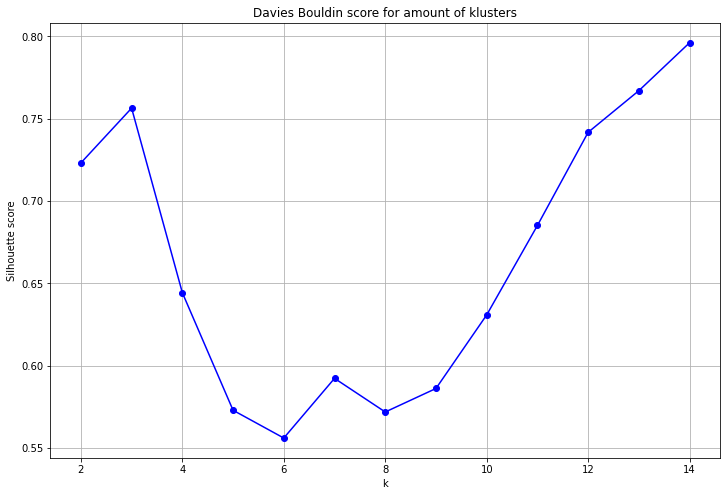

In [11]:
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering

cluster_num_seq = range(2, 15)
db_socers = []
for i in cluster_num_seq:
    ac = AgglomerativeClustering(n_clusters=i).fit_predict(data)
    db_socers.append(davies_bouldin_score(data, ac))

plt.figure(figsize=(12, 8))
plt.plot(cluster_num_seq, db_socers, 'bo-');

plt.title('Davies Bouldin score for amount of klusters')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.grid()

plt.show()

W tej metryce im niższy wynik tym lepiej. Najlepszy wynik otrzymał k=6, więc stwórzmy model dla tej liczby klastrów. 

### Klasteryzacja hierarchiczna

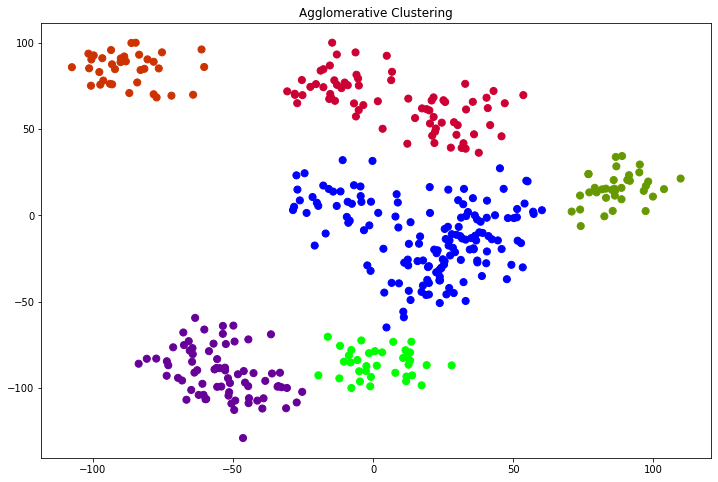

In [12]:
model = AgglomerativeClustering(n_clusters=6)

plt.figure(figsize=(12, 8))
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=model.fit_predict(data), s=50, cmap='brg')

plt.title('Agglomerative Clustering')

plt.show()

Powstały podział również wygląda prawidłowo. 